# 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [1]:
!pip install wordcloud

     ---------------------------------------- 153.1/153.1 kB ? eta 0:00:00


데이터 파일
 - 대한민국_헌법_ words.txt
 - korea_law_mask.png
 - en-a_new_hope.txt
 - stormtrooper_mask.png

Text(0.5, 1.0, '한글 테스트')

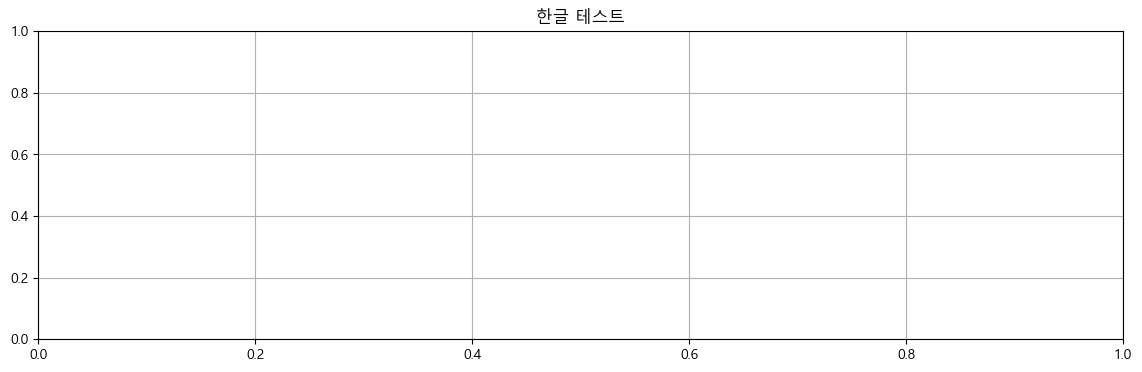

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)


font_path = 'C:/Windows/Fonts/Malgun.ttf'
#font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
#font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = fontname
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글 테스트')

In [3]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

## Mask 만들기

1. gimp
2. white 배경의 검정 마스크

In [68]:
flag_mask = np.array(Image.open('../data/하트.jpg'))

In [92]:
flag_mask

array([[[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]]

In [69]:
from IPython.display import Image as IPImage

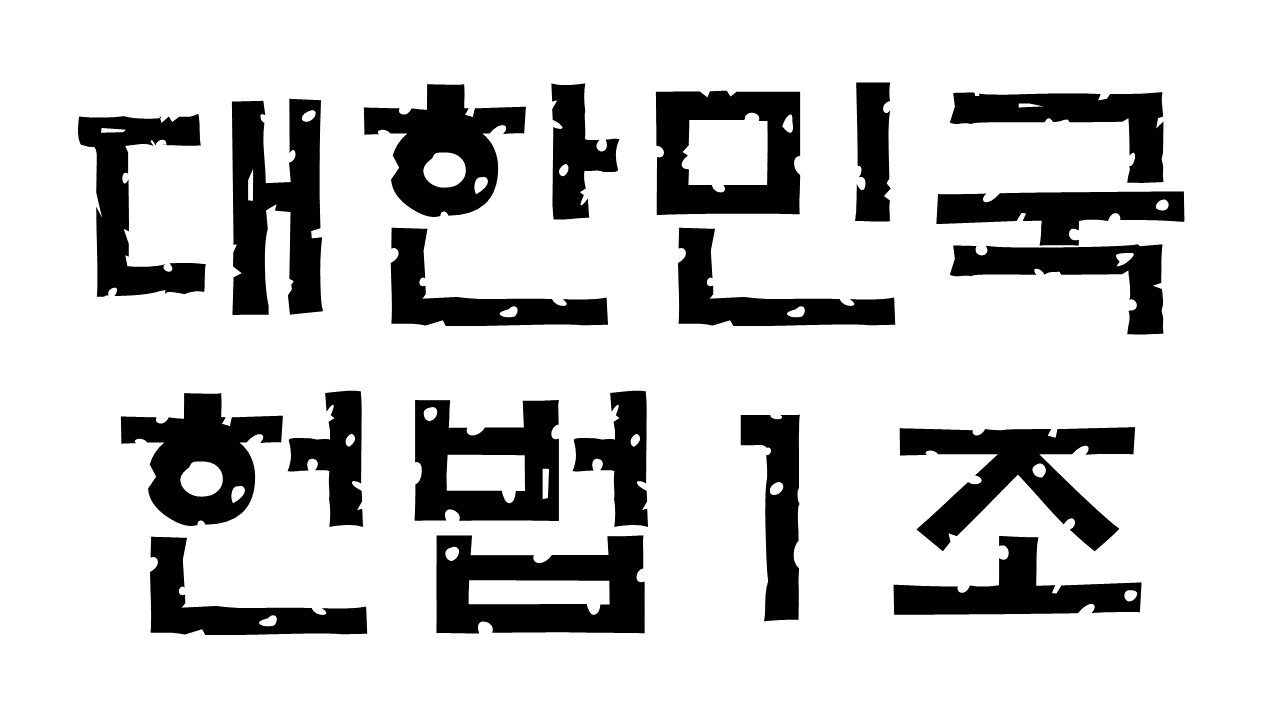

In [70]:
IPImage('../data/korea_law_mask.png')

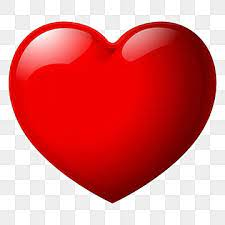

In [71]:
IPImage('../data/하트.jpg')

# 대한민국 헌법

In [22]:
with open('../data/대한민국_헌법_ words.txt', 'rt', encoding='utf-8') as f:
    text = f.read()

In [23]:
text[:10]

'전문 유구한 역사와'

In [24]:
text = text.split(' ')  # 단어, tokenizing
text[:10]

['전문',
 '유구한',
 '역사와',
 '전통에',
 '빛나는',
 '대한국민은',
 '3·1운동으로',
 '건립된',
 '대한민국임시정부의',
 '법통과']

In [25]:
len(text)

4471

## 빈도 만들기: Counter

In [26]:
from collections import Counter

In [27]:
text_counter = Counter(text) # 현재는 단어!!

In [28]:
type(Counter(text))

collections.Counter

In [30]:
text_counter.most_common(10)  # 가장 많은 빈도 수를 가진 단어 10개를 sorting해서 표시해줌

[('법률로', 101),
 ('한다.', 71),
 ('있다.', 67),
 ('정하는', 55),
 ('또는', 51),
 ('모든', 41),
 ('정한다.', 40),
 ('가진다.', 35),
 ('국가는', 34),
 ('바에', 34)]

## 빈도 만들기: Series

In [31]:
# 텍스트 단어 빈도수2
import pandas as pd

text_bin = pd.Series(text)

In [88]:
text_bin

0           전문
1          유구한
2          역사와
3          전통에
4          빛나는
         ...  
4466       규칙은
4467       헌법에
4468        따른
4469    자치규칙으로
4470       본다.
Length: 4471, dtype: object

In [90]:
text_bin.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4466    False
4467     True
4468     True
4469    False
4470     True
Length: 4471, dtype: bool

In [91]:
text_bin[ text_bin.duplicated()]

40      바탕으로
47        모든
52       하고,
82       자유와
112       모든
        ... 
4463      시행
4464     당시의
4467     헌법에
4468      따른
4470     본다.
Length: 2250, dtype: object

In [35]:
text_bin.value_counts() [:10]

법률로     101
한다.      71
있다.      67
정하는      55
또는       51
모든       41
정한다.     40
가진다.     35
국가는      34
바에       34
dtype: int64

In [36]:
text_counter = text_bin.value_counts()

In [94]:
flag_mask.shape

(225, 225, 3)

In [82]:
wc = WordCloud(background_color='white', 
               font_path= font_path,
               max_words=2000, 
               mask=flag_mask)
wc.generate_from_frequencies(dict(text_counter[:200]))
# wc = wc.generate(''.join(results))
# wc.words_

In [83]:
with open('../data/대한민국_헌법_ words.txt', 'rt', encoding='utf-8') as f:
    text1 = f.read()

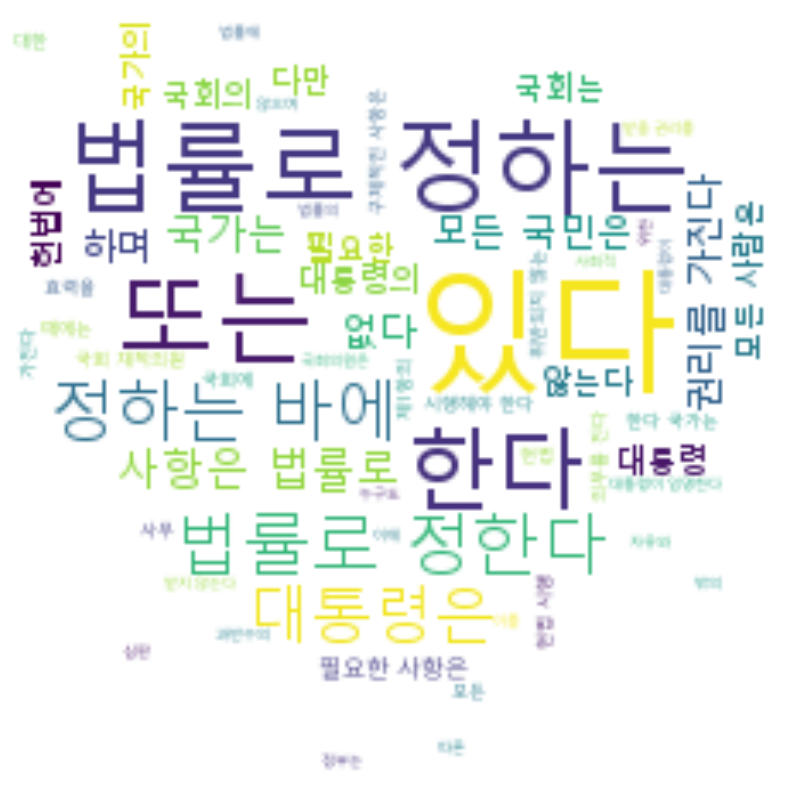

In [87]:
wc.generate_from_text(text1)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')

plt.axis('off')
plt.show()

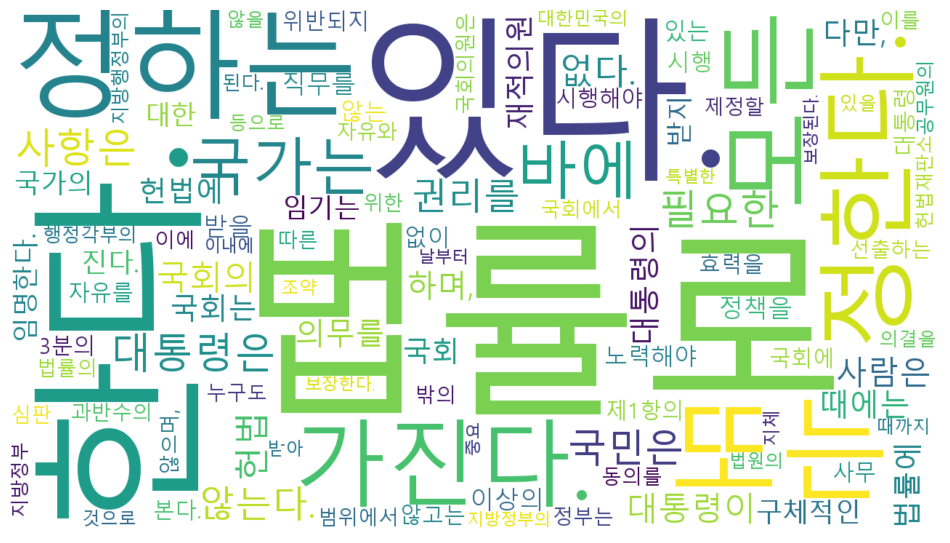

In [43]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 스타워즈

In [50]:
text = open('../data/en-a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/en-stormtrooper_mask.png'))

In [51]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [52]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [53]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

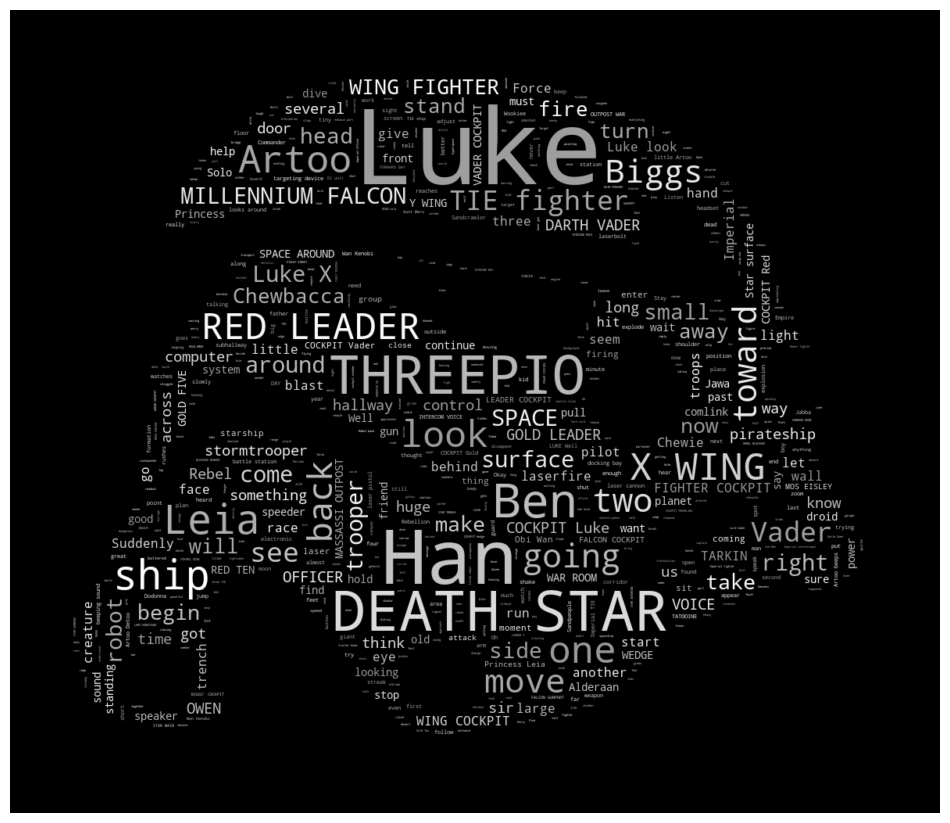

In [54]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()